<a href="https://colab.research.google.com/github/VirginieBfd/generic-deep-learning-tools/blob/master/ViT_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
! pip install transformers
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch
import torchvision
import torchvision.transforms as transforms
import random 
import matplotlib.pyplot as plt
import numpy as np

def imshow(image):
    depth = len(image)
    if depth == 3:
      image = np.transpose(image, (1, 2, 0))
    plt.imshow(image)
    plt.show()


batch_size = 1
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform={})

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Files already downloaded and verified


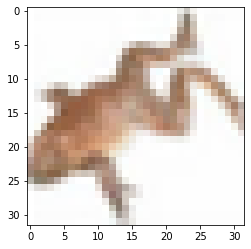

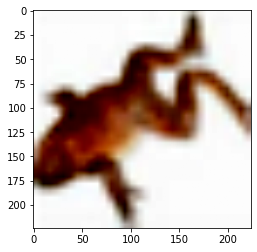

Predicted class: tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui


In [78]:
idx = random.randint(0, len(testset))
image = testset.data[idx]
imshow(image)
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=image, return_tensors="pt")
transformed_image = inputs["pixel_values"].numpy()[0]
imshow(transformed_image)
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

In [92]:
print("The pretrained model has {}M paramaters".format(model.num_parameters() / 10e6))

The pretrained model has 8.6567656M paramaters


In [93]:
# https://medium.com/@yanis.labrak/how-to-train-a-custom-vision-transformer-vit-image-classifier-to-help-endoscopists-in-under-5-min-2e7e4110a353
# https://jalammar.github.io/illustrated-transformer/
# https://huggingface.co/google/vit-base-patch16-224